<a href="https://colab.research.google.com/github/utper/Capstone/blob/master/filtrofir2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La función aplicar_fir(N) implementa un filtro FIR (Finite Impulse Response), que es un tipo de filtro digital utilizado en procesamiento de señales.
Un filtro FIR es un sistema lineal de respuesta finita, lo que significa que su respuesta a una señal de entrada es completamente determinada por un número finito de coeficientes. La salida y[n] de un filtro FIR de orden N está dada por la convolución entre la señal de entrada x[n] y la respuesta al impulso b[n]:

Donde:

b[k] son los coeficientes del filtro.

x[n-k] son los valores de la señal de entrada retrasados.

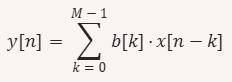

Algunos calculos.
Asumiendo que:
M = 4,
b = [0.2, 0.2, 0.2, 0.2],
x = [-0.50640335, -0.02957428, -0.47714175, 0.37072688]
Tenemos:
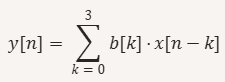

Cuando aplicamos np.convolve(x, b, mode='same'), hay diferentes maneras de tratar los bordes del arreglo. Una de las más comunes es rellenar con ceros (zero-padding), que es lo que asumimos aquí. Esto significa que los valores inexistentes se consideran como 0, permitiendo calcular y[0] así:
* Hallando 𝑦[0]:

𝑦[0] = (0.2 ⋅ 𝑥[-2]) + (0.2 ⋅ 𝑥[-1]) + (0.2 ⋅ 𝑥[0]) + (0.2 ⋅ 𝑥[1])

𝑦[0] = (0.2 ⋅ 0) + (0.2 ⋅ 0) + (0.2 ⋅ (-0.50640335)) + (0.2 ⋅ (-0.02957428))

𝑦[0] = (0) + (0) + (0.2 ⋅ -0.62457613) + (0.2 ⋅ 0.16309028)

y[0] = -0.107195526

* Hallando 𝑦[1]:

𝑦[1] = (0.2 ⋅ 𝑥[-1]) + (0.2 ⋅ 𝑥[0]) + (0.2 ⋅ 𝑥[1]) + (0.2 ⋅ 𝑥[2])

𝑦[1] = (0.2 ⋅ 0) + (0.2 ⋅ (-0.50640335)) + (0.2 ⋅ (-0.02957428)) + (0.2 ⋅ (-0.47714175))

y[1] = -0.20262388




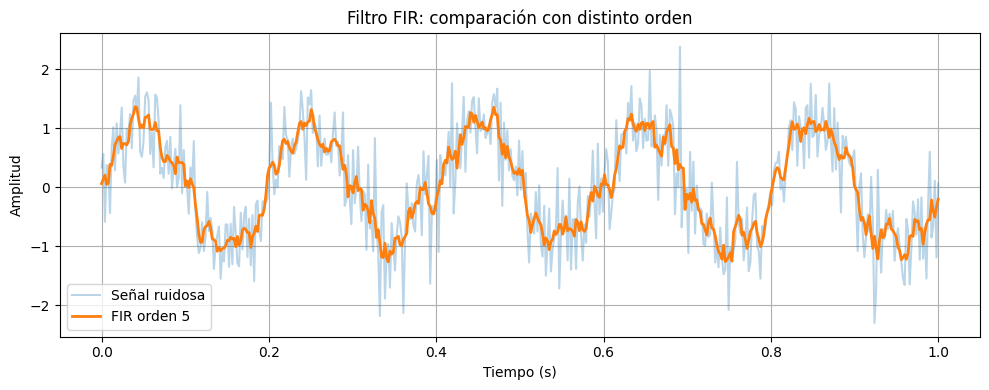

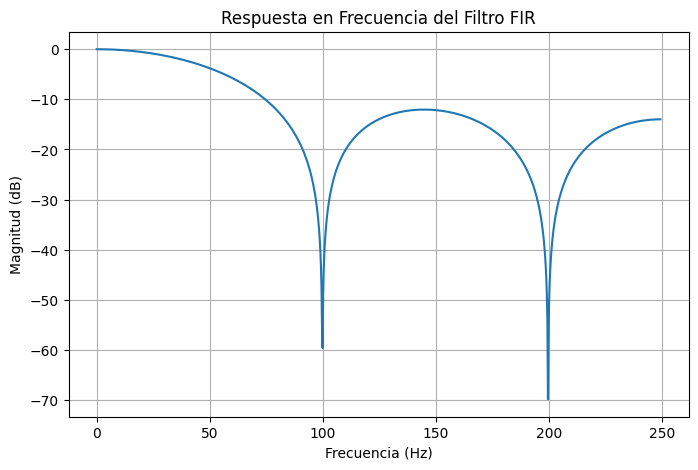

Frecuencia de corte estimada: 49.90 Hz


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

t = np.linspace(0, 1, 500)
x = np.sin(2 * np.pi * 5 * t) + 0.5 * np.random.randn(len(t))

def aplicar_fir(N):
    if N < 1: N = 1

    # Coeficientes del filtro FIR (ventana rectangular)
    b = np.ones(N) / N

    # Aplicar la convolución
    y = np.convolve(x, b, mode='same')

    # Gráfico de la señal filtrada en el dominio del tiempo
    plt.figure(figsize=(10, 4))
    plt.plot(t, x, label="Señal ruidosa", alpha=0.3)
    plt.plot(t, y, label=f"FIR orden {N}", linewidth=2)
    plt.title("Filtro FIR: comparación con distinto orden")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Cálculo de la respuesta en frecuencia del filtro FIR
    w, h = freqz(b, worN=1024)
    f = w / (2 * np.pi * t[1])  # Convertir frecuencia angular a Hz

    plt.figure(figsize=(8, 5))
    plt.plot(f, 20 * np.log10(abs(h)))  # Convertir magnitud a decibelios
    plt.title("Respuesta en Frecuencia del Filtro FIR")
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Magnitud (dB)")
    plt.grid(True)
    plt.show()

    # Frecuencia de corte estimada
    T_s = t[1] - t[0]
    f_c = 1 / (2 * N * T_s)
    print(f"Frecuencia de corte estimada: {f_c:.2f} Hz")

aplicar_fir(5)  # Puedes cambiar el orden del filtro aquí

# 🔎 Interpretación de la Frecuencia de Corte
# * Frecuencia de corte (~49.9 Hz para N=5):
#   ** La frecuencia de corte es el punto donde la magnitud se reduce aproximadamente a -3 dB, lo que indica que la señal en esa
#      frecuencia se ha atenuado a la mitad de su potencia original.
#   ** Para un filtro FIR de orden bajo (N=5), la transición entre "paso" y "rechazo" es gradual, no abrupta.